In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
a=pd.read_csv("Churn.csv")

In [4]:
a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
origianl=a.copy()

In [6]:
a.shape

(7043, 21)

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
a.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
a.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
a=a.drop(["customerID"],axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
a[a.select_dtypes(include=["object"]).columns]=a[a.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [14]:
from sklearn.model_selection import train_test_split
a_train,a_test=train_test_split(a,test_size=.2)

In [15]:
df1=a_train[a_train.Churn==1]  # Class 1 less compared to class 0 record Problem

In [16]:
a_train.shape

(5634, 20)

In [17]:
a_train=pd.concat([a_train,df1])

In [18]:
a_train.Churn.value_counts()

0    4155
1    2958
Name: Churn, dtype: int64

In [19]:
a_train_x=a_train.iloc[:,0:-1]
a_train_y=a_train.iloc[:,-1]

In [20]:
a_test_x=a_test.iloc[:,0:-1]
a_test_y=a_test.iloc[:,-1]

In [21]:
a_train_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4079,0,0,1,0,10,1,2,1,2,0,0,0,0,0,0,1,1,78.15,5847
1612,1,0,1,1,67,1,2,1,0,2,2,0,0,0,1,0,2,87.40,4854
4253,1,0,1,1,22,1,2,1,0,0,2,0,2,0,0,1,2,88.75,1459
6812,0,1,0,0,45,1,0,1,2,2,0,2,0,0,0,1,0,85.70,3243
4509,0,0,0,0,1,1,0,1,0,2,0,0,2,0,0,0,2,84.30,6172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0,0,0,0,30,1,0,0,2,2,2,2,2,2,1,0,0,85.35,2185
3716,0,0,1,0,11,1,2,1,0,2,0,0,2,2,0,1,2,102.00,276
484,0,0,1,1,8,1,0,1,0,2,0,0,2,0,0,1,2,83.55,5384
5629,1,1,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.05,1607


In [22]:
a_train_y

4079    0
1612    1
4253    0
6812    0
4509    1
       ..
4910    1
3716    1
484     1
5629    1
4255    1
Name: Churn, Length: 7113, dtype: int32

In [23]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()

In [24]:
logi.fit(a_train_x,a_train_y)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred=logi.predict(a_test_x)

In [26]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
a_tab=confusion_matrix(a_test_y,pred)
a_tab

array([[790, 229],
       [102, 288]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(a_test_y,pred)*100

76.5081618168914

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(a_test_y,pred)*100

73.84615384615385

In [33]:
from sklearn.metrics import precision_score
precision_score(a_test_y,pred)*100

55.705996131528046

In [34]:
from sklearn.metrics import f1_score
f1_score(a_test_y,pred)*100

63.50606394707828

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [36]:
pred_prob=logi.predict_proba(a_test_x)
pred_prob

array([[0.88565203, 0.11434797],
       [0.93267039, 0.06732961],
       [0.99180261, 0.00819739],
       ...,
       [0.54876254, 0.45123746],
       [0.91858007, 0.08141993],
       [0.2322548 , 0.7677452 ]])

In [37]:
roc_auc_score(a_test_y,pred)*100

75.68657054427418

In [38]:
pred_prob[:,1]

array([0.11434797, 0.06732961, 0.00819739, ..., 0.45123746, 0.08141993,
       0.7677452 ])

In [39]:
fpr,tpr,ther=roc_curve(a_test_y,pred_prob[:,1])

Text(0.5, 0.5, 'Auroc is 75.68')

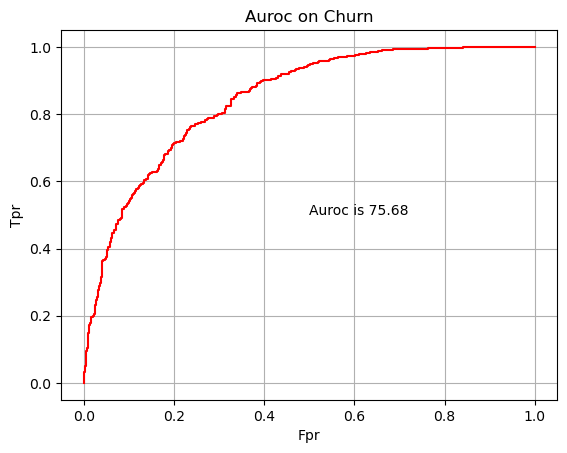

In [41]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="r")
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Auroc on Churn")
plt.grid()
plt.text(x=.5,y=.5,s="Auroc is 75.68")